In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
import tensorflow as tf
from keras import backend as K

np.random.seed(42)
tf.set_random_seed(1234)

sess = tf.Session(graph=tf.get_default_graph())
K.set_session(sess)

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11395072/11490434 [============================>.] - ETA: 0s

In [3]:
# # pick randomly 6000 images
# indices = np.random.randint(0, x_train.shape[0], 6000)

# x_train, y_train = x_train[indices], y_train[indices]

In [4]:
print('Wymiary obrazka to {}'.format(x_train[0].shape))

Wymiary obrazka to (28, 28)


In [5]:
print('Liczba obrazków: {}'.format(x_train.shape[0]))

Liczba obrazków: 60000


In [7]:
# normalize

x_train, x_test = x_train/255, x_test/255
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [8]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

Przykładowy obrazek


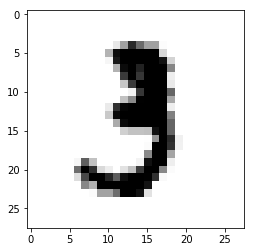

In [9]:
print('Przykładowy obrazek')
plt.imshow(x_train[10,:,:,0], cmap = 'Greys');

In [10]:
# define a model

def make_model():
    
    model = Sequential()
    model.add(Conv2D(32, 3, activation='relu', padding='same',input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(64, 3, activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(128, activation='tanh'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    return model

In [11]:
make_model().summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               401536    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
__________

In [12]:
# all optimizers will their default learning rates

sgd_with_momentum = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=False)
sgd_nestorov = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
sgd = keras.optimizers.SGD(lr=0.01)
adagrad = keras.optimizers.adagrad()
optimizers = {'adam' : 'adam', 'sgd': sgd, 'momentum': sgd_with_momentum, 'nestorov' : sgd_nestorov, 
              'rmsprop' : 'rmsprop', 'adagrad' : adagrad}

In [13]:
losses = {}
test_set_accuracy = {}
for key in optimizers.keys():
    model = make_model()
    model.compile(optimizer=optimizers[key], loss='categorical_crossentropy', metrics = ['categorical_accuracy'])
    history = model.fit(x_train, y_train, epochs=10) #batch_size=32
    losses[key] = history.history['loss']
    test_set_accuracy[key] = model.evaluate(x_test, y_test)

Epoch 1/10
60000/60000 [==============================] - 51s - loss: 0.1212 - categorical_accuracy: 0.9634    
Epoch 2/10
60000/60000 [==============================] - 11s - loss: 0.0541 - categorical_accuracy: 0.9840    
Epoch 3/10
60000/60000 [==============================] - 11s - loss: 0.0425 - categorical_accuracy: 0.9874    
Epoch 4/10
60000/60000 [==============================] - 11s - loss: 0.0362 - categorical_accuracy: 0.9888    
Epoch 5/10
60000/60000 [==============================] - 11s - loss: 0.0315 - categorical_accuracy: 0.9905    
Epoch 6/10
60000/60000 [==============================] - 11s - loss: 0.0280 - categorical_accuracy: 0.9914    
Epoch 7/10
60000/60000 [==============================] - 11s - loss: 0.0259 - categorical_accuracy: 0.9920    
Epoch 8/10
60000/60000 [==============================] - 11s - loss: 0.0231 - categorical_accuracy: 0.9932    
Epoch 9/10
60000/60000 [==============================] - 11s - loss: 0.0219 - categorical_accuracy: 0.9

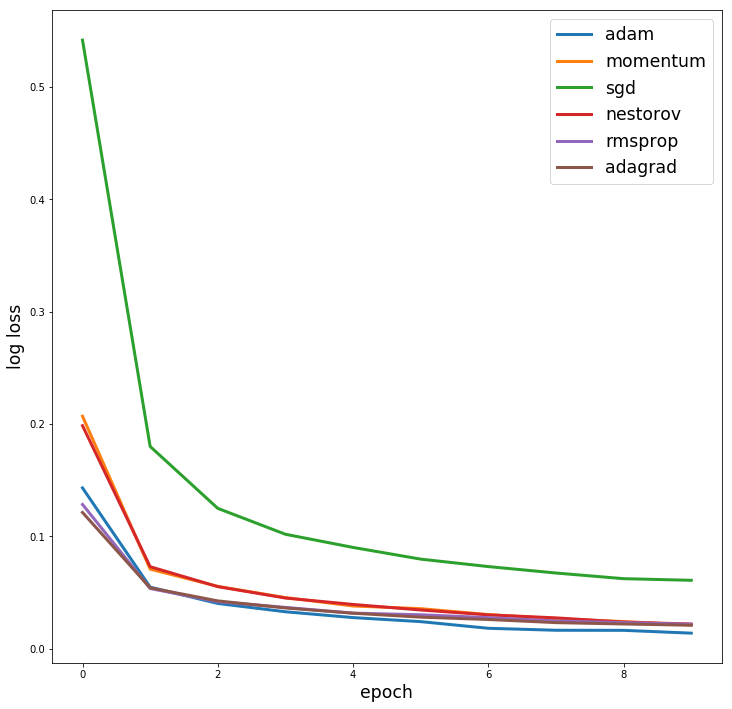

In [15]:
plt.figure(figsize = (12,12))
plt.plot(losses['adam'], label = 'adam', linewidth=3)
plt.plot(losses['momentum'], label = 'momentum', linewidth=3)
plt.plot(losses['sgd'], label = 'sgd', linewidth=3)
plt.plot(losses['nestorov'], label = 'nestorov', linewidth=3)
plt.plot(losses['rmsprop'], label = 'rmsprop', linewidth=3)
plt.plot(losses['adagrad'], label = 'adagrad', linewidth=3)
plt.ylabel('log loss', fontsize='xx-large')
plt.xlabel('epoch', fontsize='xx-large')
plt.legend(fontsize='xx-large');

In [39]:
import pandas as pd
df = pd.DataFrame.from_dict(test_set_accuracy, orient='index')
df.columns = ['log loss', 'accuracy']
df.sort_values(by='accuracy', ascending=False)

,log loss,accuracy
nestorov,0.023864,0.9928
rmsprop,0.031539,0.9918
momentum,0.028554,0.9916
adagrad,0.023211,0.9913
adam,0.031038,0.9912
sgd,0.038701,0.9871


In [2]:
# from IPython.display import HTMLb
# HTML('<img src="contours_evaluation_optimizers.gif">')

Źródłó: http://ruder.io/optimizing-gradient-descent/index.html#fn:15

In [1]:
# from IPython.display import HTML
# HTML('<img src="saddle_point_evaluation_optimizers.gif">')

Źródłó: http://ruder.io/optimizing-gradient-descent/index.html#fn:15